In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Navigating to the directory containing  zip file
!unzip /content/drive/MyDrive/Bone_Fracture_Binary_Classification.zip -d /content/drive/MyDrive


Archive:  /content/drive/MyDrive/Bone_Fracture_Binary_Classification.zip
replace /content/drive/MyDrive/Bone_Fracture_Binary_Classification/test/fractured/0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import cv2

image_path = '/content/drive/MyDrive/Bone_Fracture_Binary_Classification/test/fractured/000151594.png'
image = cv2.imread(image_path)

# Check the shape of the image
print("Image shape:", image.shape)


Image shape: (1917, 1698, 3)


In [ ]:
import os
import cv2
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
import collections as deque
import matplotlib.pyplot as plt


from moviepy.editor import*
%matplotlib inline

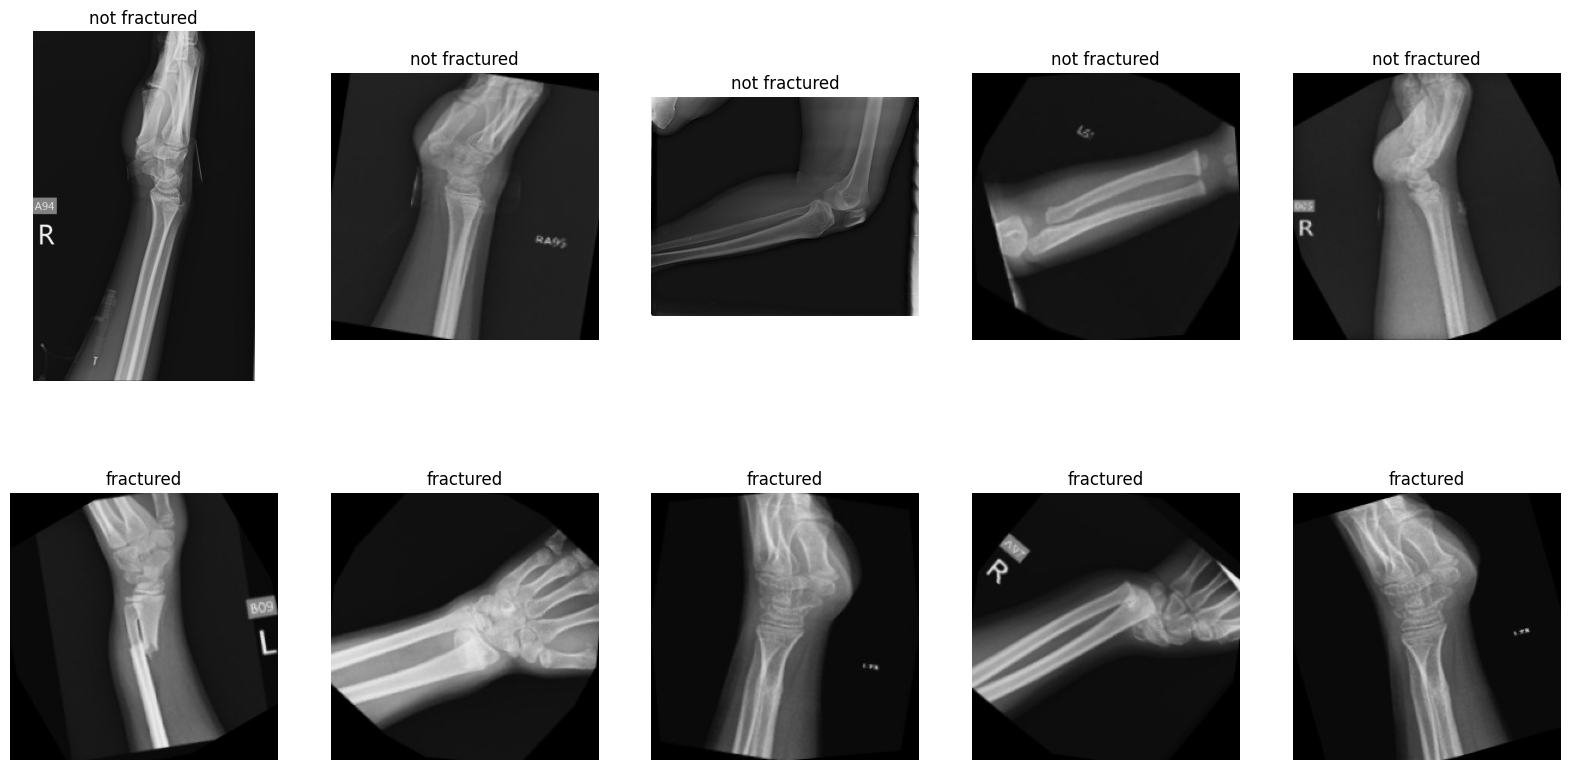

In [ ]:

# Path to the dataset
dataset_path = '/content/drive/MyDrive/Bone_Fracture_Binary_Classification/train'

# Get names of all classes
all_classes_names = os.listdir(dataset_path)


# Create matplotlib figure and specify the size of the figure
plt.figure(figsize=(20, 10))

# Iterate through the selected classes
for i, all_class in enumerate(all_classes_names, 1):
    # Get image files from the selected class
    image_files_list = os.listdir(f'{dataset_path}/{all_class}')

    # Randomly select 5 images from the class
    selected_images = random.sample(image_files_list, 5)

    # Iterate through the selected images
    for j, selected_image in enumerate(selected_images, 1):
        # Read the image
        image_path = f'{dataset_path}/{all_class}/{selected_image}'
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Display the image
        plt.subplot(2, 5, i*5 + j - 5)
        plt.imshow(image)
        plt.title(all_class)
        plt.axis('off')

# Show the matplotlib figure with the images
plt.show()


In [ ]:
import os
import numpy as np
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [ ]:
# Paths to the dataset
fractured_images_dir = '/content/drive/MyDrive/Bone_Fracture_Binary_Classification/train/fractured'
non_fractured_images_dir = '/content/drive/MyDrive/Bone_Fracture_Binary_Classification/train/not fractured'
SIZE = 150

In [ ]:
# # Prepare dataset and labels
# dataset = []
# label = []

# def load_images_from_folder(folder, label_value):
#     for image_name in os.listdir(folder):
#         if image_name.endswith('.png'):
#             image_path = os.path.join(folder, image_name)
#             image = cv2.imread(image_path)
#             image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
#             image = Image.fromarray(image)
#             image = image.resize((SIZE, SIZE))
#             dataset.append(np.array(image))
#             label.append(label_value)

# # Load fractured images with label 1
# load_images_from_folder(fractured_images_dir, 1)

# # Load non-fractured images with label 0
# load_images_from_folder(non_fractured_images_dir, 0)

In [ ]:
# Prepare dataset and labels
dataset = []
label = []

def load_images_from_folder(folder, label_value):
    for image_name in os.listdir(folder):
        try:
            image_path = os.path.join(folder, image_name)
            image = cv2.imread(image_path)
            if image is None:
                print(f"Failed to read image: {image_path}")
                continue
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            image = Image.fromarray(image)
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(label_value)
        except Exception as e:
            print(f"Error processing image: {image_path}, Error: {str(e)}")

# Example usage:
# Load fractured images with label 1 (assuming folder contains images of various formats)
load_images_from_folder(fractured_images_dir, 1)

# Load non-fractured images with label 0
load_images_from_folder(non_fractured_images_dir, 0)


Failed to read image: /content/drive/MyDrive/Bone_Fracture_Binary_Classification/train/fractured/26(1).jpg
Failed to read image: /content/drive/MyDrive/Bone_Fracture_Binary_Classification/train/fractured/159.jpg
Failed to read image: /content/drive/MyDrive/Bone_Fracture_Binary_Classification/train/fractured/2.jpg


In [ ]:
# Convert dataset and labels to numpy arrays
dataset = np.array(dataset)
label = np.array(label)

# Reshape dataset to add the single channel dimension
dataset = np.expand_dims(dataset, axis=-1)

# Shuffle the dataset
indices = np.arange(dataset.shape[0])
np.random.shuffle(indices)
dataset = dataset[indices]
label = label[indices]

In [ ]:
# Split dataset into training and validation sets
split_index = int(0.8 * len(dataset))
x_train, x_val = dataset[:split_index], dataset[split_index:]
y_train, y_val = label[:split_index], label[split_index:]


In [ ]:
# Normalize the images
x_train = x_train / 255.0
x_val = x_val / 255.0

In [ ]:
# Define a simpler CNN model
model = Sequential([
    Input(shape=(SIZE, SIZE, 1)),  # Grayscale image has 1 channel
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

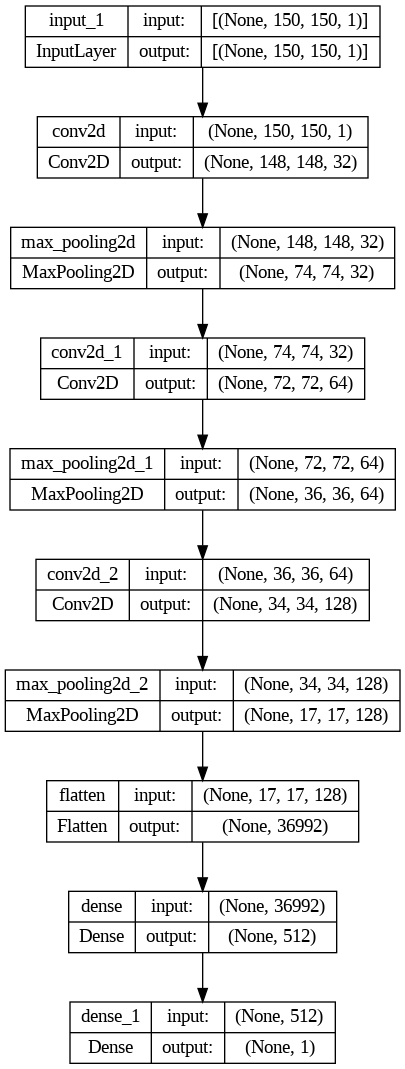

In [ ]:
# Plot the structure of the contructed LRCN model.
from tensorflow.keras.utils import plot_model

plot_model(model, to_file = 'model_structure_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=20,
    validation_data=(x_val, y_val)
)


Epoch 1/20
232/232 [==============================] - 14s 34ms/step - loss: 0.4652 - accuracy: 0.7570 - val_loss: 0.1859 - val_accuracy: 0.9356
Epoch 2/20
232/232 [==============================] - 6s 28ms/step - loss: 0.1001 - accuracy: 0.9700 - val_loss: 0.0490 - val_accuracy: 0.9838
Epoch 3/20
232/232 [==============================] - 6s 28ms/step - loss: 0.0283 - accuracy: 0.9920 - val_loss: 0.0641 - val_accuracy: 0.9784
Epoch 4/20
232/232 [==============================] - 7s 29ms/step - loss: 0.0097 - accuracy: 0.9969 - val_loss: 0.0406 - val_accuracy: 0.9881
Epoch 5/20
232/232 [==============================] - 6s 28ms/step - loss: 0.0051 - accuracy: 0.9981 - val_loss: 0.0423 - val_accuracy: 0.9892
Epoch 6/20
232/232 [==============================] - 7s 28ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0473 - val_accuracy: 0.9881
Epoch 7/20
232/232 [==============================] - 6s 27ms/step - loss: 0.0410 - accuracy: 0.9878 - val_loss: 0.0353 - val_accuracy: 0.992

In [ ]:
# Save the model
model.save('bone_fracture_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


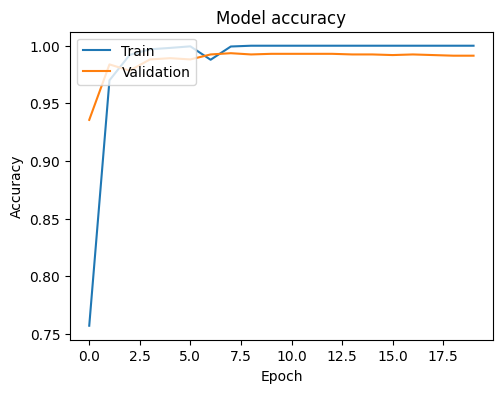

In [ ]:
# Evaluate the model
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

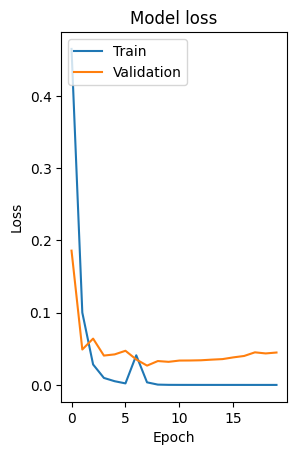

In [ ]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

58/58 [==============================] - 1s 8ms/step


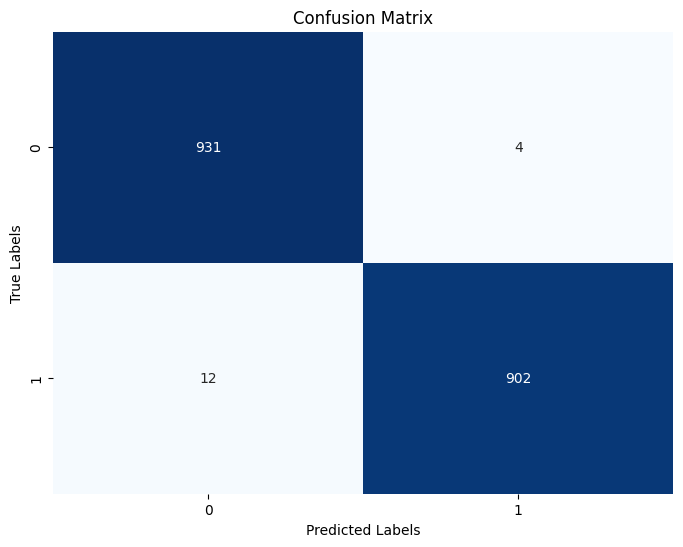

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       935
           1       1.00      0.99      0.99       914

    accuracy                           0.99      1849
   macro avg       0.99      0.99      0.99      1849
weighted avg       0.99      0.99      0.99      1849



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Evaluate the model on the validation set
y_pred = model.predict(x_val)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))


In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/bone_fracture_classification_model.h5')

# Define a function to preprocess the input image and make predictions
def classify_image(img):
    # Convert the image to grayscale
    img = img.convert('L')
    # Resize the image to 150x150
    img = img.resize((150, 150))
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Rescale the image
    img_array = img_array / 255.0
    # Expand dimensions to match the input shape of the model
    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension
    img_array = np.expand_dims(img_array, axis=0)   # Add batch dimension

    # Make a prediction
    prediction = model.predict(img_array)
    # Get the class label
    label = 'Fractured' if prediction[0] > 0.5 else 'Not Fractured'
    confidence = float(prediction[0][0]) if prediction[0] > 0.5 else float(1 - prediction[0][0])
    return label, confidence

# Create the Gradio interface
iface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil"),
    outputs=[gr.Label(), gr.Number(label="Confidence")],
    title="Bone Fracture Classification By Navin project",
    description="Upload an X-ray image of a bone to classify if it is fractured or not."
)

# Launch the interface
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://5bf1524d228a0f17b5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
